In [1]:
# prepare data for semi-supervise learning 

In [1]:
# evaluate prediction resluts
import pandas as pd
file = open("./test_results.tsv","r",encoding="utf-8")
df = pd.read_csv(file,sep='\t',encoding="utf-8",header=None)
print(df.shape)

(9981964, 21)


In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.001698,0.011749,0.000179,0.023056,0.019562,0.002615,0.118714,0.000874,0.001585,0.002087,...,0.029327,0.002733,0.006932,0.724786,0.004055,0.005079,0.002708,0.000655,0.028929,0.011084
1,0.001842,0.078071,0.000130,0.001960,0.809009,0.002268,0.024778,0.005210,0.002112,0.000593,...,0.003069,0.000891,0.002313,0.038552,0.000454,0.000557,0.009403,0.000886,0.002055,0.015030
2,0.012039,0.062425,0.000518,0.024784,0.026032,0.006249,0.101938,0.004188,0.020300,0.006138,...,0.055093,0.013232,0.039576,0.526834,0.010060,0.006092,0.011668,0.003307,0.028524,0.036912
3,0.004188,0.038205,0.000200,0.041857,0.003007,0.002495,0.136576,0.003287,0.002349,0.002933,...,0.024545,0.022630,0.091129,0.515927,0.006969,0.006383,0.004260,0.001817,0.072717,0.010756
4,0.011064,0.039054,0.000394,0.009268,0.012158,0.003934,0.429088,0.009404,0.004951,0.002641,...,0.057354,0.011914,0.054523,0.287438,0.002414,0.006051,0.002537,0.002500,0.047055,0.003113


In [3]:
#get the index and value of most probable class
pred_list = []
pred_prob = []
for row in df.iterrows():
    index, data = row
    item = data.tolist()
    max_value = max(item)
    pred_prob.append(max_value)
    max_index = item.index(max_value)
    pred_list.append(max_index)
    if index % 1000000 == 0:
        print(index)

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000


In [4]:
#create indx dictionaries
pred_ind = {}
pred_prob_ind = {}
for i in range(len(pred_list)):
    pred_ind[i] = pred_list[i]
    pred_prob_ind[i] = pred_prob[i]
print(pred_ind[0])

14


In [5]:
sorted_prob = sorted(pred_prob,reverse=True)
print(sorted_prob[0:10])

[0.9990268, 0.9990103000000001, 0.9990103000000001, 0.9989819999999999, 0.9989819999999999, 0.9989747999999999, 0.9989735000000001, 0.9989710999999999, 0.9989710999999999, 0.9989710999999999]


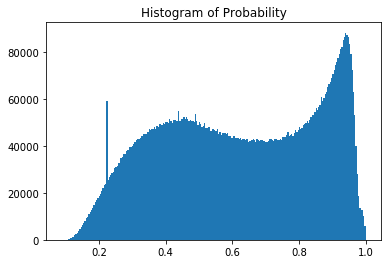

In [8]:
import matplotlib.pyplot as plt
plt.hist(sorted_prob, bins='auto') 
plt.title("Histogram of Probability")
plt.show()

In [6]:
# check the number of samples greate than threshold
threshold = 0.8
print(len([ prob for prob in sorted_prob if prob >= threshold ]))

2984058


In [9]:
# check the threshold by top n
top_n = 2495491
print(sorted_prob[top_n-1])

0.8378770000000001


In [10]:
# get indexes of samples which above the threshold
threshold = 0.8378770000000001
select_ind = []
for k,v in pred_prob_ind.items():
    if v >= threshold:
        select_ind.append(k)
print(len(select_ind))

2495491


In [11]:
#get true labels and label map
import pandas as pd
file = open("./train.tsv","r",encoding="utf-8")
df = pd.read_csv(file,sep='\t',encoding="utf-8")

label_list = []
for row in df.iterrows():
    index, data = row
#     print(data.tolist())

    item = data.tolist()
    label = item[1]
    label_list.append(label)

label_list = list(sorted(set(label_list)))
label_map = {}

for i in range(len(label_list)):
    label_map[label_list[i]] = i
    
ind2lab = {v:k for k,v in label_map.items()}

In [12]:
print(ind2lab)

{0: 'Algeria', 1: 'Bahrain', 2: 'Djibouti', 3: 'Egypt', 4: 'Iraq', 5: 'Jordan', 6: 'Kuwait', 7: 'Lebanon', 8: 'Libya', 9: 'Mauritania', 10: 'Morocco', 11: 'Oman', 12: 'Palestine', 13: 'Qatar', 14: 'Saudi_Arabia', 15: 'Somalia', 16: 'Sudan', 17: 'Syria', 18: 'Tunisia', 19: 'United_Arab_Emirates', 20: 'Yemen'}


In [13]:
print(label_map)

{'Algeria': 0, 'Bahrain': 1, 'Djibouti': 2, 'Egypt': 3, 'Iraq': 4, 'Jordan': 5, 'Kuwait': 6, 'Lebanon': 7, 'Libya': 8, 'Mauritania': 9, 'Morocco': 10, 'Oman': 11, 'Palestine': 12, 'Qatar': 13, 'Saudi_Arabia': 14, 'Somalia': 15, 'Sudan': 16, 'Syria': 17, 'Tunisia': 18, 'United_Arab_Emirates': 19, 'Yemen': 20}


In [14]:
# get predicted label for the selected samples
selected_labels = {}
for i in select_ind:
    label = ind2lab[pred_ind[i]]
    selected_labels[i] = label

In [15]:
select_ind = sorted(select_ind)
print(len(select_ind))

2495491


In [16]:
# get tweet and write into list of dictinary with label
import csv
import random
from collections import defaultdict

out_file = []
d = defaultdict(int)

with open("./test.tsv") as f:
    line_reader= csv.DictReader(f, delimiter='\t')
    for ind, row in enumerate(line_reader):  
        item = {}
        if ind == select_ind[0]:
            tweet = row["tweet"].replace("\n","").replace("\t","").replace("\r","")
            label = selected_labels[ind]
            item['tweet'] = tweet
            item['label'] = label
            out_file.append(item)
            d[label]+=1
            
            select_ind.pop(0)
            if len(select_ind) == 0:
                break
            elif len(select_ind) % 1000 == 0:
                print(len(select_ind))
        else:
            continue
print(d)
print(len(out_file))

2495000
2494000
2493000
2492000
2491000
2490000
2489000
2488000
2487000
2486000
2485000
2484000
2483000
2482000
2481000
2480000
2479000
2478000
2477000
2476000
2475000
2474000
2473000
2472000
2471000
2470000
2469000
2468000
2467000
2466000
2465000
2464000
2463000
2462000
2461000
2460000
2459000
2458000
2457000
2456000
2455000
2454000
2453000
2452000
2451000
2450000
2449000
2448000
2447000
2446000
2445000
2444000
2443000
2442000
2441000
2440000
2439000
2438000
2437000
2436000
2435000
2434000
2433000
2432000
2431000
2430000
2429000
2428000
2427000
2426000
2425000
2424000
2423000
2422000
2421000
2420000
2419000
2418000
2417000
2416000
2415000
2414000
2413000
2412000
2411000
2410000
2409000
2408000
2407000
2406000
2405000
2404000
2403000
2402000
2401000
2400000
2399000
2398000
2397000
2396000
2395000
2394000
2393000
2392000
2391000
2390000
2389000
2388000
2387000
2386000
2385000
2384000
2383000
2382000
2381000
2380000
2379000
2378000
2377000
2376000
2375000
2374000
2373000
2372000
2371000


1470000
1469000
1468000
1467000
1466000
1465000
1464000
1463000
1462000
1461000
1460000
1459000
1458000
1457000
1456000
1455000
1454000
1453000
1452000
1451000
1450000
1449000
1448000
1447000
1446000
1445000
1444000
1443000
1442000
1441000
1440000
1439000
1438000
1437000
1436000
1435000
1434000
1433000
1432000
1431000
1430000
1429000
1428000
1427000
1426000
1425000
1424000
1423000
1422000
1421000
1420000
1419000
1418000
1417000
1416000
1415000
1414000
1413000
1412000
1411000
1410000
1409000
1408000
1407000
1406000
1405000
1404000
1403000
1402000
1401000
1400000
1399000
1398000
1397000
1396000
1395000
1394000
1393000
1392000
1391000
1390000
1389000
1388000
1387000
1386000
1385000
1384000
1383000
1382000
1381000
1380000
1379000
1378000
1377000
1376000
1375000
1374000
1373000
1372000
1371000
1370000
1369000
1368000
1367000
1366000
1365000
1364000
1363000
1362000
1361000
1360000
1359000
1358000
1357000
1356000
1355000
1354000
1353000
1352000
1351000
1350000
1349000
1348000
1347000
1346000


365000
364000
363000
362000
361000
360000
359000
358000
357000
356000
355000
354000
353000
352000
351000
350000
349000
348000
347000
346000
345000
344000
343000
342000
341000
340000
339000
338000
337000
336000
335000
334000
333000
332000
331000
330000
329000
328000
327000
326000
325000
324000
323000
322000
321000
320000
319000
318000
317000
316000
315000
314000
313000
312000
311000
310000
309000
308000
307000
306000
305000
304000
303000
302000
301000
300000
299000
298000
297000
296000
295000
294000
293000
292000
291000
290000
289000
288000
287000
286000
285000
284000
283000
282000
281000
280000
279000
278000
277000
276000
275000
274000
273000
272000
271000
270000
269000
268000
267000
266000
265000
264000
263000
262000
261000
260000
259000
258000
257000
256000
255000
254000
253000
252000
251000
250000
249000
248000
247000
246000
245000
244000
243000
242000
241000
240000
239000
238000
237000
236000
235000
234000
233000
232000
231000
230000
229000
228000
227000
226000
225000
224000
223000

In [17]:
print(len(out_file))

2495491


In [18]:
print(out_file[0])

{'tweet': 'USER سلمان ترا الجزيره ماراح يصبر عليك اذا قدمت راح يعرضونك للبيع وانت الخاسر افضل لك البقاء في الهلال حتي لو العرض اقل', 'label': 'Saudi_Arabia'}


In [19]:
print(len(out_file))
print(d)

2495491
defaultdict(<class 'int'>, {'Saudi_Arabia': 1918799, 'Kuwait': 116402, 'Egypt': 237063, 'Qatar': 1642, 'Lebanon': 21496, 'Sudan': 17314, 'Libya': 25643, 'Morocco': 8263, 'Yemen': 27457, 'Iraq': 50742, 'Bahrain': 12770, 'Oman': 31283, 'Syria': 5373, 'Tunisia': 5143, 'Algeria': 5727, 'Jordan': 7540, 'Mauritania': 579, 'Somalia': 540, 'Palestine': 1315, 'United_Arab_Emirates': 400})


In [20]:
# read previous data
with open("./train.tsv") as f:
    line_reader= csv.DictReader(f, delimiter='\t')

    for row in line_reader: 
        item = {}
        tweet = row["tweet"].replace("\n","").replace("\t","").replace("\r","").replace("RT","")
        item['tweet'] = tweet
        item['label'] = row["label"].replace("\n","").replace("\t","").replace("\r","")
        out_file.append(item)
        d[item['label']]+=1
        
print(len(d))
print(len(out_file))

21
2783577


In [21]:
#write into new file
import random
random.shuffle(out_file)
out= open('./train.tsv', 'w')
writer = csv.writer(out, delimiter = '\t') #quotechar='|'
writer.writerow(("tweet", "label"))
print(len(out_file))
count = 0
for i,item in enumerate(out_file):
    label = item['label'].replace("\n","").replace("\t","").replace("\r","")
    tweet = item['tweet'].replace("\n","").replace("\t","").replace("\r","")
    if len(tweet) != 0:
        count += 1
        writer.writerow((tweet,label))
        if count % 10000 == 0:
            print(count)
print(count)
out.close()

2783577
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380

In [1]:
##semisupervised learning setting two

In [2]:
# evaluate prediction resluts
import pandas as pd
file = open("./test_results.tsv","r",encoding="utf-8")
df = pd.read_csv(file,sep='\t',encoding="utf-8",header=None)
print(df.shape)

(9981964, 21)


In [4]:
#get the index and value of most probable class
pred_results = []
for row in df.iterrows():
    temp = []
    index, data = row
    item = data.tolist()
    max_value = max(item)
    max_index = item.index(max_value)
    temp.append(index)
    temp.append(max_value)
    temp.append(max_index)
    pred_results.append(temp)
    if index % 1000000 == 0:
        print(index)

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000


In [31]:
print(len(pred_results))
import json
with open('./10m_pred.json', 'w') as f:  # writing JSON object
    json.dump(pred_results, f)


9981964


In [1]:
import json
with open('./10m_pred.json') as json_file:  
    pred_results = json.load(json_file)
print(len(pred_results))

9981964


In [2]:
pre_data_dic = {'Lebanon': 16319, 'Egypt': 27793, 'Qatar': 19771, 'Morocco': 16430, 'Tunisia': 16837, 'Algeria': 7703, 'Jordan': 10664, 'Syria': 6998, 'Saudi_Arabia': 72411, 'Palestine': 5953, 'Yemen': 10525, 'Iraq': 11632, 'Libya': 9069, 'Oman': 11169, 'Kuwait': 13924, 'United_Arab_Emirates': 9575, 'Bahrain': 7657, 'Somalia': 4265, 'Mauritania': 2439, 'Sudan': 6752, 'Djibouti': 200}

In [3]:
class_group_pred = {}
for item in pred_results:
    if item[2] not in class_group_pred.keys():
        temp = []
        temp.append(item)
        class_group_pred[item[2]] = temp
    else:
        temp = class_group_pred[item[2]]
        temp.append(item)
        class_group_pred[item[2]] = temp
print(class_group_pred.keys())

dict_keys([14, 4, 6, 3, 16, 11, 8, 20, 1, 18, 13, 7, 10, 17, 12, 19, 0, 5, 9, 15, 2])


In [4]:
#get true labels and label map
import pandas as pd
file = open("./train.tsv","r",encoding="utf-8")
df = pd.read_csv(file,sep='\t',encoding="utf-8")

label_list = []
for row in df.iterrows():
    index, data = row
#     print(data.tolist())

    item = data.tolist()
    label = item[1]
    label_list.append(label)

label_list = list(sorted(set(label_list)))
label_map = {}

for i in range(len(label_list)):
    label_map[label_list[i]] = i
    
ind2lab = {v:k for k,v in label_map.items()}

In [16]:
# from operator import itemgetter
# percent_top = 0.25
# selected_list = []
# for k,v in class_group_pred.items():
#     print(ind2lab[k],": ",int(len(v)*percent_top),"\t all: ",len(v))
#     sorted_pred_results  = sorted(v, key = itemgetter(1), reverse=True)
#     top_pred = sorted_pred_results[:int(len(v)*percent_top)]
#     selected_list.extend(top_pred)
#     if len(top_pred) == 0:
#         selected_list.extend(sorted_pred_results)
# print(len(selected_list))

Saudi_Arabia :  1788078 	 all:  7152315
Iraq :  72607 	 all:  290430
Kuwait :  119743 	 all:  478974
Egypt :  170907 	 all:  683630
Sudan :  31413 	 all:  125655
Oman :  53034 	 all:  212139
Libya :  29679 	 all:  118717
Yemen :  54408 	 all:  217632
Bahrain :  31281 	 all:  125124
Tunisia :  5879 	 all:  23516
Qatar :  16959 	 all:  67836
Lebanon :  36507 	 all:  146028
Morocco :  5761 	 all:  23045
Syria :  21117 	 all:  84468
Palestine :  9471 	 all:  37887
United_Arab_Emirates :  4789 	 all:  19157
Algeria :  15580 	 all:  62320
Jordan :  19170 	 all:  76682
Mauritania :  8242 	 all:  32968
Somalia :  859 	 all:  3439
Djibouti :  0 	 all:  2
2495486


In [5]:
###limite total number
from operator import itemgetter
total_num = 70000
selected_list = []
for k,v in class_group_pred.items():
    have_num = pre_data_dic[ind2lab[k]]
    add_num1 = total_num - have_num
    
    filter_pred = [item for item in v if item[1] >= 0.8]
    
    add_num = min(max(0,add_num1), len(filter_pred))
    
    print(ind2lab[k],": ", add_num,"\t all: ", add_num1)
    print("percent:", float(add_num)/float(len(v)))
    
    sorted_pred_results  = sorted(filter_pred, key = itemgetter(1), reverse=True)
    
    top_pred = sorted_pred_results[:add_num]
    if len(top_pred) !=0:
        print(top_pred[-1])
    print("\n")
    selected_list.extend(top_pred)
print(len(selected_list))

Saudi_Arabia :  0 	 all:  -2411
percent: 0.0


Iraq :  58368 	 all:  58368
percent: 0.20097097407292636
[3758659, 0.8058576999999999, 4]


Kuwait :  56076 	 all:  56076
percent: 0.11707524834333388
[9851490, 0.9356317, 6]


Egypt :  42207 	 all:  42207
percent: 0.061739537469098785
[5216730, 0.9562748999999999, 3]


Sudan :  22034 	 all:  63248
percent: 0.1753531494966376
[1873245, 0.80000585, 16]


Oman :  35191 	 all:  58831
percent: 0.16588651780200717
[4646215, 0.80001795, 11]


Libya :  28658 	 all:  60931
percent: 0.24139760944093938
[1033333, 0.8000229999999999, 8]


Yemen :  36161 	 all:  59475
percent: 0.16615663137773856
[2527053, 0.8000039000000001, 20]


Bahrain :  14813 	 all:  62343
percent: 0.1183865605319523
[8918845, 0.8001451999999999, 1]


Tunisia :  5853 	 all:  53163
percent: 0.24889436979078075
[4083074, 0.8000586, 18]


Qatar :  2333 	 all:  50229
percent: 0.03439176838256973
[1256512, 0.8000136999999999, 13]


Lebanon :  26890 	 all:  53681
percent: 0.1841427671

In [6]:
sorted_selected_list = sorted(selected_list, key = itemgetter(0))
print(len(sorted_selected_list))

365579


In [7]:
# get tweet and write into list of dictinary with label
import csv
import random
from collections import defaultdict

out_file = []
d = defaultdict(int)

with open("./test.tsv") as f:
    line_reader= csv.DictReader(f, delimiter='\t')
    for ind, row in enumerate(line_reader):  
        item = {}
        if ind == sorted_selected_list[0][0]:
 
            tweet = row["tweet"].replace("\n","").replace("\t","").replace("\r","")
    
            label = ind2lab[sorted_selected_list[0][2]]
            item['tweet'] = tweet
            item['label'] = label
            out_file.append(item)
            d[label]+=1
            
            sorted_selected_list.pop(0)
            if len(sorted_selected_list) == 0:
                break
            elif len(sorted_selected_list) % 50000 == 0:
                print(len(sorted_selected_list))
        else:
            continue
print(d)
print(len(out_file))

350000
300000
250000
200000
150000
100000
50000
defaultdict(<class 'int'>, {'Iraq': 58368, 'Kuwait': 56076, 'Libya': 28658, 'Qatar': 2333, 'Egypt': 42207, 'Lebanon': 26890, 'Sudan': 22034, 'Morocco': 8878, 'Yemen': 36161, 'Bahrain': 14813, 'Syria': 7265, 'Oman': 35191, 'Palestine': 1829, 'Tunisia': 5853, 'Algeria': 6774, 'Jordan': 9992, 'United_Arab_Emirates': 826, 'Mauritania': 771, 'Somalia': 660})
365579


In [8]:
# read previous data
with open("./train.tsv") as f:
    line_reader= csv.DictReader(f, delimiter='\t')

    for row in line_reader: 
        item = {}
        tweet = row["tweet"].replace("\n","").replace("\t","").replace("\r","").replace("RT","")
        item['tweet'] = tweet
        item['label'] = row["label"].replace("\n","").replace("\t","").replace("\r","")
        out_file.append(item)
        d[item['label']]+=1
        
print(len(d))
print(len(out_file))

21
654465


In [9]:
#write into new file
import random
random.shuffle(out_file)
out= open('./train.tsv', 'w')
writer = csv.writer(out, delimiter = '\t') #quotechar='|'
writer.writerow(("tweet", "label"))
print(len(out_file))
d = defaultdict(int)
count = 0
for i,item in enumerate(out_file):
    label = item['label'].replace("\n","").replace("\t","").replace("\r","")
    tweet = item['tweet'].replace("\n","").replace("\t","").replace("\r","")
    if len(tweet) != 0:
        count += 1
        d[label]+=1
        writer.writerow((tweet,label))
        if count % 50000 == 0:
            print(count)
print(count)
out.close()

654465
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
654465


In [20]:
print(d)

defaultdict(<class 'int'>, {'United_Arab_Emirates': 18998, 'Sudan': 50000, 'Algeria': 23712, 'Libya': 50000, 'Syria': 39661, 'Oman': 50000, 'Jordan': 46237, 'Yemen': 50000, 'Kuwait': 50000, 'Saudi_Arabia': 72411, 'Lebanon': 50000, 'Egypt': 50000, 'Tunisia': 29062, 'Bahrain': 48540, 'Morocco': 31116, 'Qatar': 36178, 'Mauritania': 7945, 'Palestine': 15698, 'Iraq': 50000, 'Somalia': 6050, 'Djibouti': 1000})
